# 1a. Baseline models - RANDOM split

## Setup

**TODO** add short summary about what we do in this notebook

In [2]:
import collections
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

import bin.baseline_models as bm
import bin.params as p
import bin.utils as u

--- 

## Random train/val/test data split 

In [9]:
fasta = pd.read_csv('../../data/csv/fasta_aho_L.csv', index_col=0)
sasa = pd.read_csv('../../data/csv/sasa_aligned_L.csv', index_col=0)

In [3]:
fasta

,l_1,l_2,l_3,l_4,l_5,l_6,l_7,l_8,l_9,l_10,...,h_141,h_142,h_143,h_143A,h_144,h_145,h_146,h_147,h_148,h_149
Id,,,,,,,,,,,,,,,,,,,,,
12E8:H,-,-,-,-,-,-,-,-,-,-,...,Q,G,T,-,L,V,T,V,S,A
12E8:L,D,I,V,M,T,Q,S,Q,K,F,...,-,-,-,-,-,-,-,-,-,-
15C8:H,-,-,-,-,-,-,-,-,-,-,...,Q,G,T,-,T,L,T,V,S,S
15C8:L,D,I,V,L,T,Q,S,P,A,I,...,-,-,-,-,-,-,-,-,-,-
1A0Q:H,-,-,-,-,-,-,-,-,-,-,...,Q,G,T,-,T,L,T,V,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7RTH:L,-,-,-,-,T,Q,S,P,S,S,...,-,-,-,-,-,-,-,-,-,-
7RW2:H,-,-,-,-,-,-,-,-,-,-,...,Q,G,T,-,T,V,T,V,S,S
7RW2:L,A,I,Q,L,T,Q,S,P,S,S,...,-,-,-,-,-,-,-,-,-,-


In [4]:
sasa

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,143A,144,145,146,147,148,149
12E8:H,100.0,36.0,50.1,4.4,51.9,3.5,28.8,NaN,68.3,71.2,...,28.5,13.3,1.4,NaN,30.0,2.2,19.3,4.3,14.3,75.0
12E8:L,82.1,6.0,58.1,4.6,46.3,4.0,70.0,51.8,56.7,41.9,...,43.9,14.6,1.0,NaN,39.2,3.4,9.0,26.7,55.3,29.9
15C8:H,100.0,23.3,51.7,4.5,54.8,5.1,27.2,NaN,65.8,80.3,...,51.2,12.0,2.5,NaN,46.4,4.6,26.7,7.4,18.3,61.4
15C8:L,73.7,2.1,56.3,7.6,54.9,9.3,50.0,38.1,64.1,38.6,...,82.4,6.1,0.0,NaN,44.5,2.4,2.9,15.8,47.7,26.2
1A0Q:H,NaN,47.9,55.5,8.2,49.6,4.1,28.4,NaN,64.3,21.9,...,65.1,17.3,2.5,NaN,18.4,2.5,11.7,5.1,22.5,65.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7RTH:L,NaN,NaN,NaN,NaN,90.8,61.1,45.2,30.7,39.9,68.6,...,35.6,8.5,17.9,NaN,41.0,7.0,10.0,21.7,51.3,27.4
7RW2:H,100.0,41.0,69.0,12.0,53.6,6.9,23.5,NaN,67.5,72.0,...,59.3,17.0,3.8,NaN,45.5,4.7,43.0,8.4,75.1,100.0
7RW2:L,90.4,8.2,58.8,7.2,56.4,9.6,50.0,55.7,76.6,76.0,...,61.2,24.4,6.1,NaN,50.8,15.3,47.7,77.4,NaN,NaN
8FAB:H,100.0,31.8,61.1,6.0,46.8,4.2,49.6,NaN,46.0,44.6,...,58.4,15.1,12.9,NaN,36.8,0.5,19.4,0.6,2.1,66.9


### Split

In [5]:
from sklearn.model_selection import train_test_split

# the simplest split method, random select by percentage
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(
    fasta, sasa, 
    test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [6]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,143A,144,145,146,147,148,149
Id,,,,,,,,,,,,,,,,,,,,,
1DBA:L,D,V,V,M,T,Q,I,P,L,S,...,G,G,T,-,K,L,E,I,K,R
7LY9:L,D,I,Q,M,T,Q,S,P,S,S,...,-,-,-,-,-,-,-,-,-,-
6MV5:H,E,V,K,L,E,E,S,-,G,G,...,Q,G,T,-,L,V,T,V,S,A
3QQ9:L,D,I,V,L,T,Q,S,P,A,S,...,G,G,T,-,K,L,E,I,K,R
2DQD:L,D,I,V,L,T,Q,S,P,A,T,...,G,G,T,-,K,L,E,I,K,-


In [7]:
# check if train_test_split works correctly
(
    x_train.index.symmetric_difference(y_train.index),
    x_test.index.symmetric_difference(y_test.index),
    x_val.index.symmetric_difference(y_val.index),
)

(Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'))

### Model results

#### Model 1: Average for residue at position

In [9]:
import baseline_models as bm

avg_by_pos = bm.AverageForResidueAtPosition()
avg_by_pos.fit(x_train, y_train)
avg_by_pos_predicts = avg_by_pos.predict(x_test)
avg_by_pos_dev = avg_deviations(y_test, avg_by_pos_predicts)
avg_by_pos_dev

5HDQ:L     5.101786
5BVJ:L     5.370054
2D7T:L     5.364231
6RP8:H     5.394540
3IFO:H     6.201820
            ...    
1UJ3:L     5.110859
3T2N:L     5.987623
5FUU:L    12.433122
1CT8:L     5.260649
5H35:H     5.947242
Length: 848, dtype: float64

<AxesSubplot:xlabel='chain sequences', ylabel='avg % deviation per sequence'>

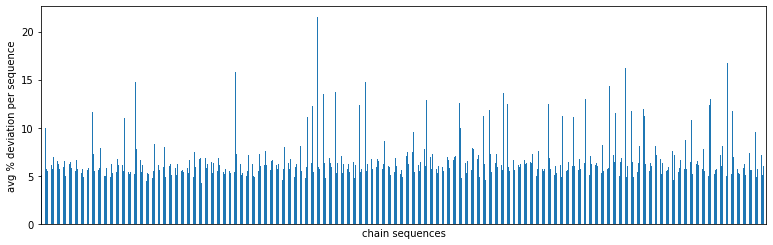

In [24]:
_=avg_by_pos_dev.plot.bar(xticks=[], xlabel='chain sequences', ylabel='avg % deviation per sequence', figsize=(13, 4))

#### Model 2: Average for the **same** residue at position

In [26]:
avg_by_sameres_pos = bm.StatisticForSameResidueAtPosition(statistic='mean')
avg_by_sameres_pos.fit(x_train, y_train)
avg_by_sameres_pos_predicts = avg_by_sameres_pos.predict(x_test)
avg_by_sameres_pos_dev = avg_deviations(y_test, avg_by_sameres_pos_predicts)
avg_by_sameres_pos_dev

5HDQ:L    3.010096
5BVJ:L    3.609910
2D7T:L    3.992027
6RP8:H    3.716021
3IFO:H    5.320030
            ...   
1UJ3:L    3.414722
3T2N:L    5.264394
5FUU:L    6.680098
1CT8:L    4.009295
5H35:H    4.192375
Length: 848, dtype: float64

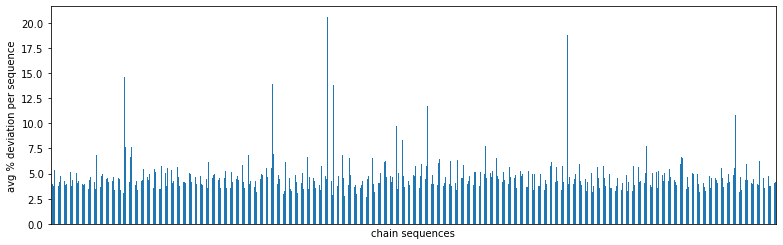

In [27]:
_=avg_by_sameres_pos_dev.plot.bar(xticks=[], xlabel='chain sequences', ylabel='avg % deviation per sequence', figsize=(13, 4))

#### Model 3: KNN

In [31]:
onehot = OneHotEncoder(handle_unknown='ignore')
onehot.fit(x_train)
x_train_oh = onehot.transform(x_train)
x_test_oh = onehot.transform(x_test)

knn = KNeighborsRegressor(n_neighbors=3)
# knn cannot handle NaNs, so replace them with -1
knn.fit(x_train_oh, y_train.fillna(-1))

predictions = pd.DataFrame(knn.predict(x_test_oh), columns=x_test.columns, index=x_test.index)
knn_dev = avg_deviations(y_test, predictions)
knn_dev

id
6LBH:H    7.347024
6LBH:L    4.898214
6LCS:H    4.320833
6LCS:L    4.807540
6LDV:H    4.994444
            ...   
7RSO:L    5.191071
7RTH:H    6.059722
7RTH:L    4.631746
7RW2:H    8.948413
7RW2:L    6.026984
Length: 1644, dtype: float64

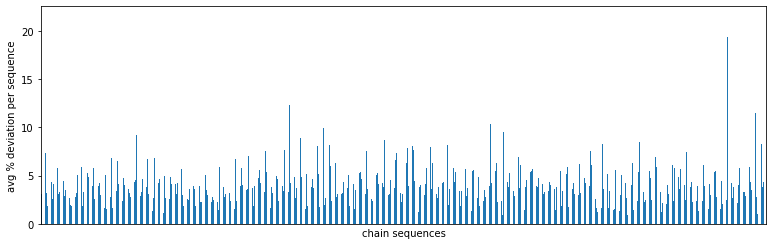

In [30]:
_=knn_dev.plot.bar(xticks=[], xlabel='chain sequences', ylabel='avg % deviation per sequence', figsize=(13, 4))

### Compare model results plot grid

Running this cell will take a while:

In [ ]:
# plot grid
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 10))
model_results = [avg_by_pos_dev, avg_by_sameres_pos_dev, knn_dev]
model_names = ['avg column sasa', 'avg from same-aa-sasa', 'knn']

for i in range(3):
    for j in range(3):
        data = model_results[i]-model_results[j]
        ax[i,j].plot(data)
        ax[i,j].axhline(y=0, c='pink')
        ax[i,j].set_title(f'{model_names[i]} vs. {model_names[j]} \n Score: {data.sum():.2f}')
        
fig.tight_layout()
plt.show()

Running this cell will take a while:

In [ ]:
# plot grid
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(15, 10))
model_results = [avg_by_pos_dev, avg_by_sameres_pos_dev, knn_dev]
model_names = ['avg column sasa', 'avg from same-aa-sasa', 'knn']

for i in range(3):
    for j in range(3):
        data = model_results[i]-model_results[j]
        ax[i,j].plot(data)
        ax[i,j].axhline(y=0, c='pink')
        ax[i,j].set_title(f'{model_names[i]} vs. {model_names[j]} \n Score: {data.sum():.2f}')
        
fig.tight_layout()
plt.show()